In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/AbstractDataset/df-Abstract.csv')
df = df.rename(columns={'No': 'ID', 'Title': 'Title', 'Abstract': 'Abstract', 'Subclass_labels': 'cpc_subclass'})
df_Abstract=df[["ID","Title","Abstract","cpc_subclass"]]
df_Abstract= df_Abstract.dropna()
df_Abstract = df_Abstract.reset_index(drop=True)
df_Abstract.head()

,ID,Title,Abstract,cpc_subclass
0,US07072141,magnetic disc unit with range of gap between d...,a magnetic disc unit having a rotating disc ty...,['G11B']
1,US06981282,systems and methods for transformable suits,methods and systems for transforming a volume ...,['A41D']
2,US06981283,gardening gloves with cushion insert to protec...,a gardening glove or the like designed to prev...,['A41D']
3,US06981284,hockey helmet comprising a lateral adjustment ...,a hockey helmet for receiving a head of a wear...,['A63B']
4,US06981285,toilet and method of operation,a toilet and toilet system suitable for a boat...,['E03D']


In [2]:
#filter base on the H section
df_Abstract_uspto = df_Abstract[df_Abstract['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_Abstract_uspto.head()

,ID,Title,Abstract,cpc_subclass
19,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
20,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
57,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
58,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
59,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']


In [3]:
len(df_Abstract_uspto)

595466

In [4]:
df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()
df_Abstract_uspto = df_Abstract_uspto.reset_index(drop=True)
df_Abstract_uspto

C:\Users\admin\AppData\Local\Temp/ipykernel_17020/868608903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Abstract"]= df_Abstract_uspto["Abstract"].dropna()


,ID,Title,Abstract,cpc_subclass
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L']
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']"
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S']
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K']
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K']
...,...,...,...,...
595461,US08975581,ion trap,an ion trap comprising a first array of magnet...,['H01J']
595462,US08976203,wavelength conversion device and image display...,a wavelength conversion device includes an exc...,"['G09G', 'G03B', 'H01S', 'H04N']"
595463,US08976510,cable assembly and electronic device,an electronic device including an electronic u...,"['H05K', 'H01R']"
595464,US08976819,circuit and method for metering electricity,a current detection module generates a first c...,"['H04J', 'G01R']"


In [5]:
df_Abstract_uspto=df_Abstract_uspto[:60000]
len(df_Abstract_uspto)

60000

# preprocessing

In [6]:
def cleantext(df_Abstract_uspto):
    # Remove unwanted characters like quotes, commas, periods, question marks, etc. from the 'Abstract' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # Convert all text to lowercase
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
    
    # Remove all numbers from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] =df_Abstract_uspto['cleaned_Abstract_text'].replace(r'\d+', '', regex = True)
        
    # Remove all non-alphanumeric characters from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    # Remove all punctuation from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    # Remove all URLs from the 'cleaned_Abstract_text' column
    df_Abstract_uspto['cleaned_Abstract_text']  = df_Abstract_uspto['cleaned_Abstract_text'].replace(r'https.*$', "", regex = True)
    
    # Replace multiple spaces with a single space
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("   ", " ", regex = True)
    df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].replace("  ", " ", regex = True)
   
    return df_Abstract_uspto

# Call the 'cleantext' function on the 'df_Abstract_uspto' dataframe
df_Abstract_uspto = cleantext(df_Abstract_uspto)
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_17020/2232787442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['Abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
C:\Users\admin\AppData\Local\Temp/ipykernel_17020/2232787442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text'] = df_Abstract_uspto['cleaned_Abstract_text'].str.lower()
C:\Users\admin\AppData\Local\Temp/ipykernel_1

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_Abstract_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_17020/2358027427.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['cleaned_Abstract_text_without_Stopwprd'] = df_Abstract_uspto['cleaned_Abstract_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...


In [8]:
# import the WordNetLemmatizer class from the nltk library
from nltk.stem import WordNetLemmatizer

# create an instance of the WordNetLemmatizer class
lemmatizer = WordNetLemmatizer()

# define a function to lemmatize words in a text
def lemmatize_words(text):
    # split the text into individual words, lemmatize each word, and join them back together into a string
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

# apply the lemmatize_words function to the cleaned abstract text without stopwords column of the dataframe
df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# view the updated dataframe with the new lemmatized abstract column
df_Abstract_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_17020/1233588646.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto["Lemmatized-Abstract"] = df_Abstract_uspto["cleaned_Abstract_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...


In [9]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'text' column
df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)
df_Abstract_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_17020/3692672784.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_uspto['Abstract_tokens'] = df_Abstract_uspto["Lemmatized-Abstract"].apply(tokenize_text)


,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."


# divide the dataset

In [10]:
#Divide the dataset into different size
df_Abstract_50K=df_Abstract_uspto[:50000]
df_Abstract_50K

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for..."
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s..."
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for..."
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca..."
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr..."
...,...,...,...,...,...,...,...,...
49995,US07180993,associating call appearance with data associat...,a distributed telephone answering system has i...,['H04M'],a distributed telephone answering system has i...,distributed telephone answering intelligence d...,distributed telephone answering intelligence d...,"[distributed, telephone, answering, intelligen..."
49996,US07262479,layout structure of fuse bank of semiconductor...,a fuse bank of a semiconductor memory device i...,['H01L'],a fuse bank of a semiconductor memory device i...,fuse bank semiconductor memory provided fuse b...,fuse bank semiconductor memory provided fuse b...,"[fuse, bank, semiconductor, memory, provided, ..."
49997,US07279979,method and arrangement for adjusting an output...,the invention relates to power amplifiers havi...,['H03G'],the invention relates to power amplifiers havi...,relates power amplifiers adjustable output imp...,relates power amplifier adjustable output impe...,"[relates, power, amplifier, adjustable, output..."
49998,US07224052,ic card with controller and memory chips,an ic card capable of reinforcing the preventi...,"['H01L', 'G06K']",an ic card capable of reinforcing the preventi...,ic card capable reinforcing prevention electro...,ic card capable reinforcing prevention electro...,"[ic, card, capable, reinforcing, prevention, e..."


In [11]:
New_Sample = df_Abstract_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens
59394,US07187658,data transmission apparatus selecting efficien...,a data transmission apparatus is provided for ...,"['G06F', 'H04L']",a data transmission apparatus is provided for ...,transmission provided transmitting received us...,transmission provided transmitting received us...,"[transmission, provided, transmitting, receive..."


In [12]:
new_Abstract = str(New_Sample["Lemmatized-Abstract"].iloc[0])
new_Abstract

'transmission provided transmitting received user terminal network destination user terminal executing communication using internet protocol transmission routing table storing relating destination address address network table storing static dynamic network selection unit selecting one network transmission transmits destination based static dynamic transmission enables transmission appropriate network selecting appropriate network based static dynamic network'

# NMF on 50K patent data

In [13]:
import pandas as pd
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_Abstract_50K['Lemmatized-Abstract']]

# Apply n-gram (1,3)
bigram_phrases = Phrases(docs, min_count=10)
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)
#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]

# Create the dictionary and document-term matrix
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)
corpus = [id2word.doc2bow(doc) for doc in docs]

# Compute tf-idf scores
tfidf = TfidfModel(corpus)
tfidf_corpus = tfidf[corpus]

# Train the NMF model
num_topics = 50
nmf_model = Nmf(tfidf_corpus, num_topics=num_topics, random_state=42)

# Transform the corpus to get the topic distribution for each document
nmf_output = nmf_model[tfidf_corpus]

# Calculate coherence metrics
cm_cv = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()

cm_npmi = CoherenceModel(model=nmf_model, texts=docs, corpus=tfidf_corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()

cm_umass = CoherenceModel(model=nmf_model, corpus=tfidf_corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.5086765377913532
c_npmi coherence: 0.040271597693551875
u_mass coherence: -3.7103216024478765


In [14]:
  for i in range(num_topics):
    print(f"Topic {i}:")
    topic_words = [id2word[int(word_id)] for word_id, _ in nmf_model.show_topic(i, topn=5)]
    print(topic_words)

Topic 0:
['node', 'message', 'network', 'link', 'path']
Topic 1:
['signal', 'digital', 'received', 'receiver', 'analog']
Topic 2:
['capacitor', 'connector', 'contact', 'pin', 'capacitance']
Topic 3:
['layer', 'structure', 'light_emitting', 'magnetic', 'semiconductor']
Topic 4:
['optical', 'wavelength', 'light', 'laser', 'optical_fiber']
Topic 5:
['phase', 'pixel', 'first', 'second', 'clock_signal']
Topic 6:
['power', 'module', 'control', 'mode', 'power_supply']
Topic 7:
['video', 'filter', 'color', 'display', 'picture']
Topic 8:
['material', 'structure', 'battery', 'contact', 'may']
Topic 9:
['first', 'second', 'conductive', 'third', 'line']
Topic 10:
['metal', 'dielectric_layer', 'layer', 'formed', 'semiconductor']
Topic 11:
['switch', 'position', 'slot', 'port', 'side']
Topic 12:
['communication', 'station', 'wireless', 'service', 'base_station']
Topic 13:
['region', 'semiconductor', 'gate_electrode', 'channel', 'formed']
Topic 14:
['conductor', 'coil', 'wiring', 'chip', 'magnetic']


In [15]:
# Get the most probable topic and its probability for each document
doc_topics = [sorted(nmf_model.get_document_topics(doc), key=lambda x: x[1], reverse=True) for doc in nmf_output]

In [18]:
# Create empty columns for topic number and probability
df_Abstract_50K['nmf_topics'] = 0
df_Abstract_50K['nmf_prob'] = 0.0

# Loop through each document and update the corresponding row in the dataframe   
for i, doc in enumerate(doc_topics):
    if len(doc) > 0:
        topic_num, topic_prob = doc[0]
        df_Abstract_50K.at[i, 'nmf_topics'] = topic_num
        df_Abstract_50K.at[i, 'nmf_prob'] = topic_prob    

C:\Users\admin\AppData\Local\Temp/ipykernel_17020/236627805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_50K['nmf_topics'] = 0
C:\Users\admin\AppData\Local\Temp/ipykernel_17020/236627805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Abstract_50K['nmf_prob'] = 0.0


In [20]:
df_Abstract_50K.head()

,ID,Title,Abstract,cpc_subclass,cleaned_Abstract_text,cleaned_Abstract_text_without_Stopwprd,Lemmatized-Abstract,Abstract_tokens,nmf_topics,nmf_prob
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],when mounting an ic chip on a circuit board bu...,mounting ic chip circuit board bumps formed el...,mounting ic chip circuit board bump formed ele...,"[mounting, ic, chip, circuit, board, bump, for...",16,0.395939
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article of footwear includes a sole an insole ...,article footwear sole insole overlying sole in...,article footwear sole insole overlying sole in...,"[article, footwear, sole, insole, overlying, s...",16,0.490580
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],an electrical connector configured to nonrigid...,electrical connector nonrigidly apply force se...,electrical connector nonrigidly apply force se...,"[electrical, connector, nonrigidly, apply, for...",40,0.518165
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],a flexible bar handler that comprises a mobile...,flexible bar handler comprises mobile carriage...,flexible bar handler comprises mobile carriage...,"[flexible, bar, handler, comprises, mobile, ca...",16,0.549102
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],a brush holder incorporates a terminal integra...,brush holder incorporates terminal integral co...,brush holder incorporates terminal integral co...,"[brush, holder, incorporates, terminal, integr...",31,0.215025


In [21]:
df_Abstract_50K_topic=df_Abstract_50K[["ID","Title","Abstract","cpc_subclass","Lemmatized-Abstract", "nmf_topics", "nmf_prob"]]
df_Abstract_50K_topic.head()

,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,nmf_topics,nmf_prob
0,US06981317,method and device for mounting electronic comp...,when mounting an ic chip on a circuit board bu...,['H01L'],mounting ic chip circuit board bump formed ele...,16,0.395939
1,US06981339,article of footwear with temperature regulatio...,article of footwear includes a sole an insole ...,"['H05B', 'A43B']",article footwear sole insole overlying sole in...,16,0.490580
2,US07032288,methods for magnetically establishing an elect...,an electrical connector configured to nonrigid...,['H01S'],electrical connector nonrigidly apply force se...,40,0.518165
3,US07032289,stator bar handler,a flexible bar handler that comprises a mobile...,['H02K'],flexible bar handler comprises mobile carriage...,16,0.549102
4,US07032290,manufacturing method for brush holder,a brush holder incorporates a terminal integra...,['H02K'],brush holder incorporates terminal integral co...,31,0.215025


In [22]:
#prediction

In [23]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]
query_tokens = trigram_phrases[bigram_phrases[new_Abstract.split()]]
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query
query_tfidf = tfidf[query_bow]
query_topic_dist = nmf_model[query_tfidf]

# Get the top 3 topics for the query
top_topics = sorted(query_topic_dist, key=lambda x: x[1], reverse=True)[:3]

# Print the top 3 topics with words and probabilities
for topic_id, topic_prob in top_topics:
    print(f"Topic {topic_id} (probability: {topic_prob:.2f})")

Topic 15 (probability: 0.38)
Topic 35 (probability: 0.35)
Topic 19 (probability: 0.14)


In [26]:
# filter the documents that have a predicted topic (for example here predicted topi for query is 15)

In [27]:
filter_topics_nmf=df_Abstract_50K_topic[df_Abstract_50K_topic['nmf_topics'] == 15]
filter_topics_nmf = filter_topics_nmf.sort_values('nmf_prob', ascending=False)
filter_topics_nmf = filter_topics_nmf.reset_index().rename(columns={'index': 'new_index'})
filter_topics_nmf

,new_index,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,nmf_topics,nmf_prob
0,23946,US07064647,fabricated air core reactor,a method and apparatus for an air core reactor...,['H01F'],air core reactor straight member offset member...,15,0.183286
1,41050,US07129622,driving apparatus use thereof and an optical s...,a driving apparatus has at least two driving m...,"['H01L', 'H02N']",driving least two driving member least one dri...,15,0.181279
2,32450,US07095305,retractable magnetic sweeper,a retractable magnetic sweeper includes a shel...,['H01F'],retractable magnetic sweeper shell member retr...,15,0.167992
3,33241,US07102262,anchoring system for injection molded magnets ...,a power tool includes a flux ring with an annu...,['H02K'],power tool flux ring annular member least one ...,15,0.160316
4,43559,US07138588,operating member,the operating member is constructed by support...,['H01H'],operating member constructed supporting button...,15,0.136877
5,29405,US07084540,magnet motor and method of assembly,a magnet motor with rotor assembly is provided...,['H02K'],magnet motor rotor assembly provided magnet me...,15,0.106216


In [28]:
#calculate the similarity between the query and document in dataset with the Doc2Vec embedding

In [29]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Convert the list of documents to a list of sentences
sentences = [doc.split() for doc in filter_topics_nmf['Lemmatized-Abstract'].tolist()]

# Create a list of TaggedDocument objects, where each TaggedDocument represents a single document in the corpus
# The words attribute of each TaggedDocument is set to a list of tokens for the corresponding document
# The tags attribute of each TaggedDocument is set to a list containing a single string, which is the index of the document in the corpus
tagged_data = [TaggedDocument(words=sentences[i], tags=[str(i)]) for i in range(len(sentences))]

# Train a Doc2Vec model on the tagged documents
# The vector_size parameter specifies the dimensionality of the document vectors
# The window parameter specifies the maximum distance between the predicted word and the context words within a sentence
# The min_count parameter specifies the minimum frequency of a word in the corpus to be included in the vocabulary
# The epochs parameter specifies the number of iterations over the corpus during training
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=5, epochs=50)

# Infer the document vector for the new claim
# The split() method converts the string to a list of tokens
# The infer_vector() method calculates the document vector using the trained model
new_Abstarct_vector = model.infer_vector(new_Abstract.split())

# Calculate the cosine similarity between the new claim and the documents in the corpus
# The infer_vector() method is called for each document in the corpus to calculate the document vectors
doc_vectors = [model.infer_vector(sentences[i]) for i in range(len(sentences))]
similarity_scores = cosine_similarity([new_Abstarct_vector], doc_vectors)

In [30]:
# Add a new column to the dataframe to store the similarity scores
filter_topics_nmf['cosin_similarity_Doc2vec'] = similarity_scores[0]
filter_topics_nmf

,new_index,ID,Title,Abstract,cpc_subclass,Lemmatized-Abstract,nmf_topics,nmf_prob,cosin_similarity_Doc2vec
0,23946,US07064647,fabricated air core reactor,a method and apparatus for an air core reactor...,['H01F'],air core reactor straight member offset member...,15,0.183286,-0.030764
1,41050,US07129622,driving apparatus use thereof and an optical s...,a driving apparatus has at least two driving m...,"['H01L', 'H02N']",driving least two driving member least one dri...,15,0.181279,-0.024248
2,32450,US07095305,retractable magnetic sweeper,a retractable magnetic sweeper includes a shel...,['H01F'],retractable magnetic sweeper shell member retr...,15,0.167992,-0.000909
3,33241,US07102262,anchoring system for injection molded magnets ...,a power tool includes a flux ring with an annu...,['H02K'],power tool flux ring annular member least one ...,15,0.160316,0.021214
4,43559,US07138588,operating member,the operating member is constructed by support...,['H01H'],operating member constructed supporting button...,15,0.136877,0.006826
5,29405,US07084540,magnet motor and method of assembly,a magnet motor with rotor assembly is provided...,['H02K'],magnet motor rotor assembly provided magnet me...,15,0.106216,-0.032245


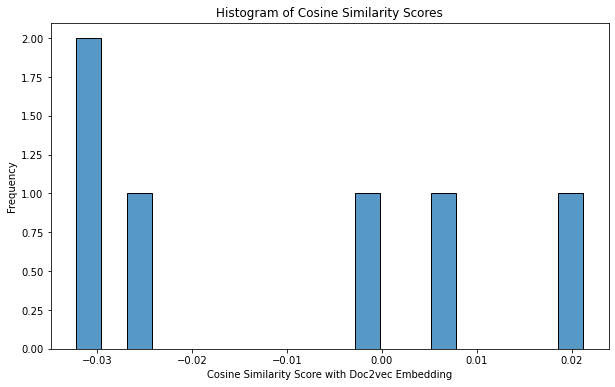

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_nmf['cosin_similarity_Doc2vec']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity Score with Doc2vec Embedding')
plt.ylabel('Frequency')
plt.show()

In [32]:
#get the most similar doc in dataset to query

In [33]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['Abstract']

most_similar_doc

'a power tool includes a flux ring with an annular member at least one molded magnet is received on the annular member an anchor is on the annular member to retain the at least one magnet on the annular member the anchor is unitarily formed with the annular member to receive the magnet the anchor includes at least one bend with a reinforcement member at the at least one bend'

In [34]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_nmf = filter_topics_nmf.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_nmf.iloc[0]['Lemmatized-Abstract']

most_similar_doc

'power tool flux ring annular member least one molded magnet received annular member anchor annular member retain least one magnet annular member anchor unitarily formed annular member receive magnet anchor least one bend reinforcement member least one bend'